In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from keras.preprocessing import sequence

In [ ]:
vocab_size = 5000 # Consider the top 5000 most frequent words
max_words = 500 # Consider only the first 500 words in each review
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
# Pad sequences to the same length
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test  = sequence.pad_sequences(X_test,  maxlen=max_words)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_words))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          640000    
                                                                 
 spatial_dropout1d (Spatial  (None, 500, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 528s 2s/step - loss: 0.2745 - accuracy: 0.8926 - val_loss: 0.2273 - val_accuracy: 0.9122
Epoch 2/5
313/313 [==============================] - 513s 2s/step - loss: 0.2124 - accuracy: 0.9183 - val_loss: 0.2582 - val_accuracy: 0.8922
Epoch 3/5
313/313 [==============================] - 512s 2s/step - loss: 0.1728 - accuracy: 0.9351 - val_loss: 0.2487 - val_accuracy: 0.9022
Epoch 4/5
313/313 [==============================] - 513s 2s/step - loss: 0.1599 - accuracy: 0.9409 - val_loss: 0.3255 - val_accuracy: 0.8984
Epoch 5/5
313/313 [==============================] - 507s 2s/step - loss: 0.1755 - accuracy: 0.9319 - val_loss: 0.3047 - val_accuracy: 0.8844


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%'%(score[1]*100))

Accuracy: 86.41%


In [ ]:
import matplotlib.pyplot as plt

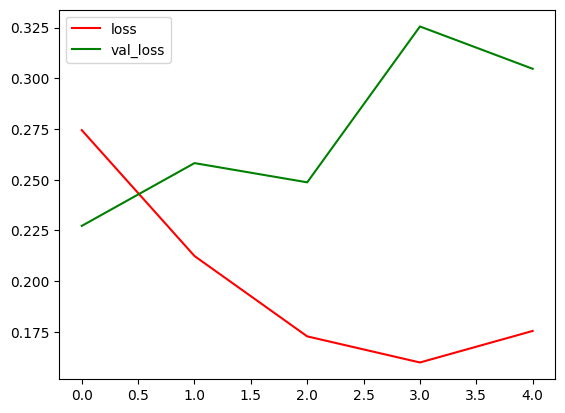

In [ ]:
plt.plot(history.history['loss'], label='loss', color='r')
plt.plot(history.history['val_loss'], label='val_loss', color='g')
plt.legend()

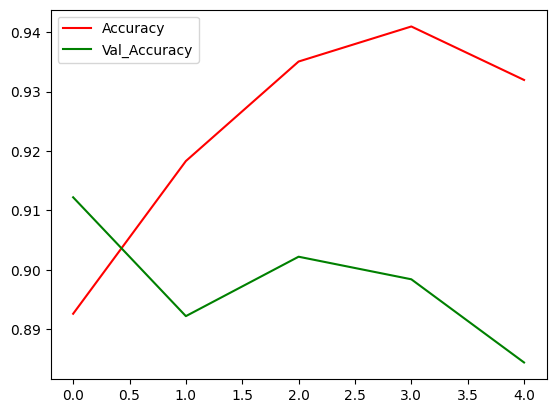

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy', color='r')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy', color='g')
plt.legend()